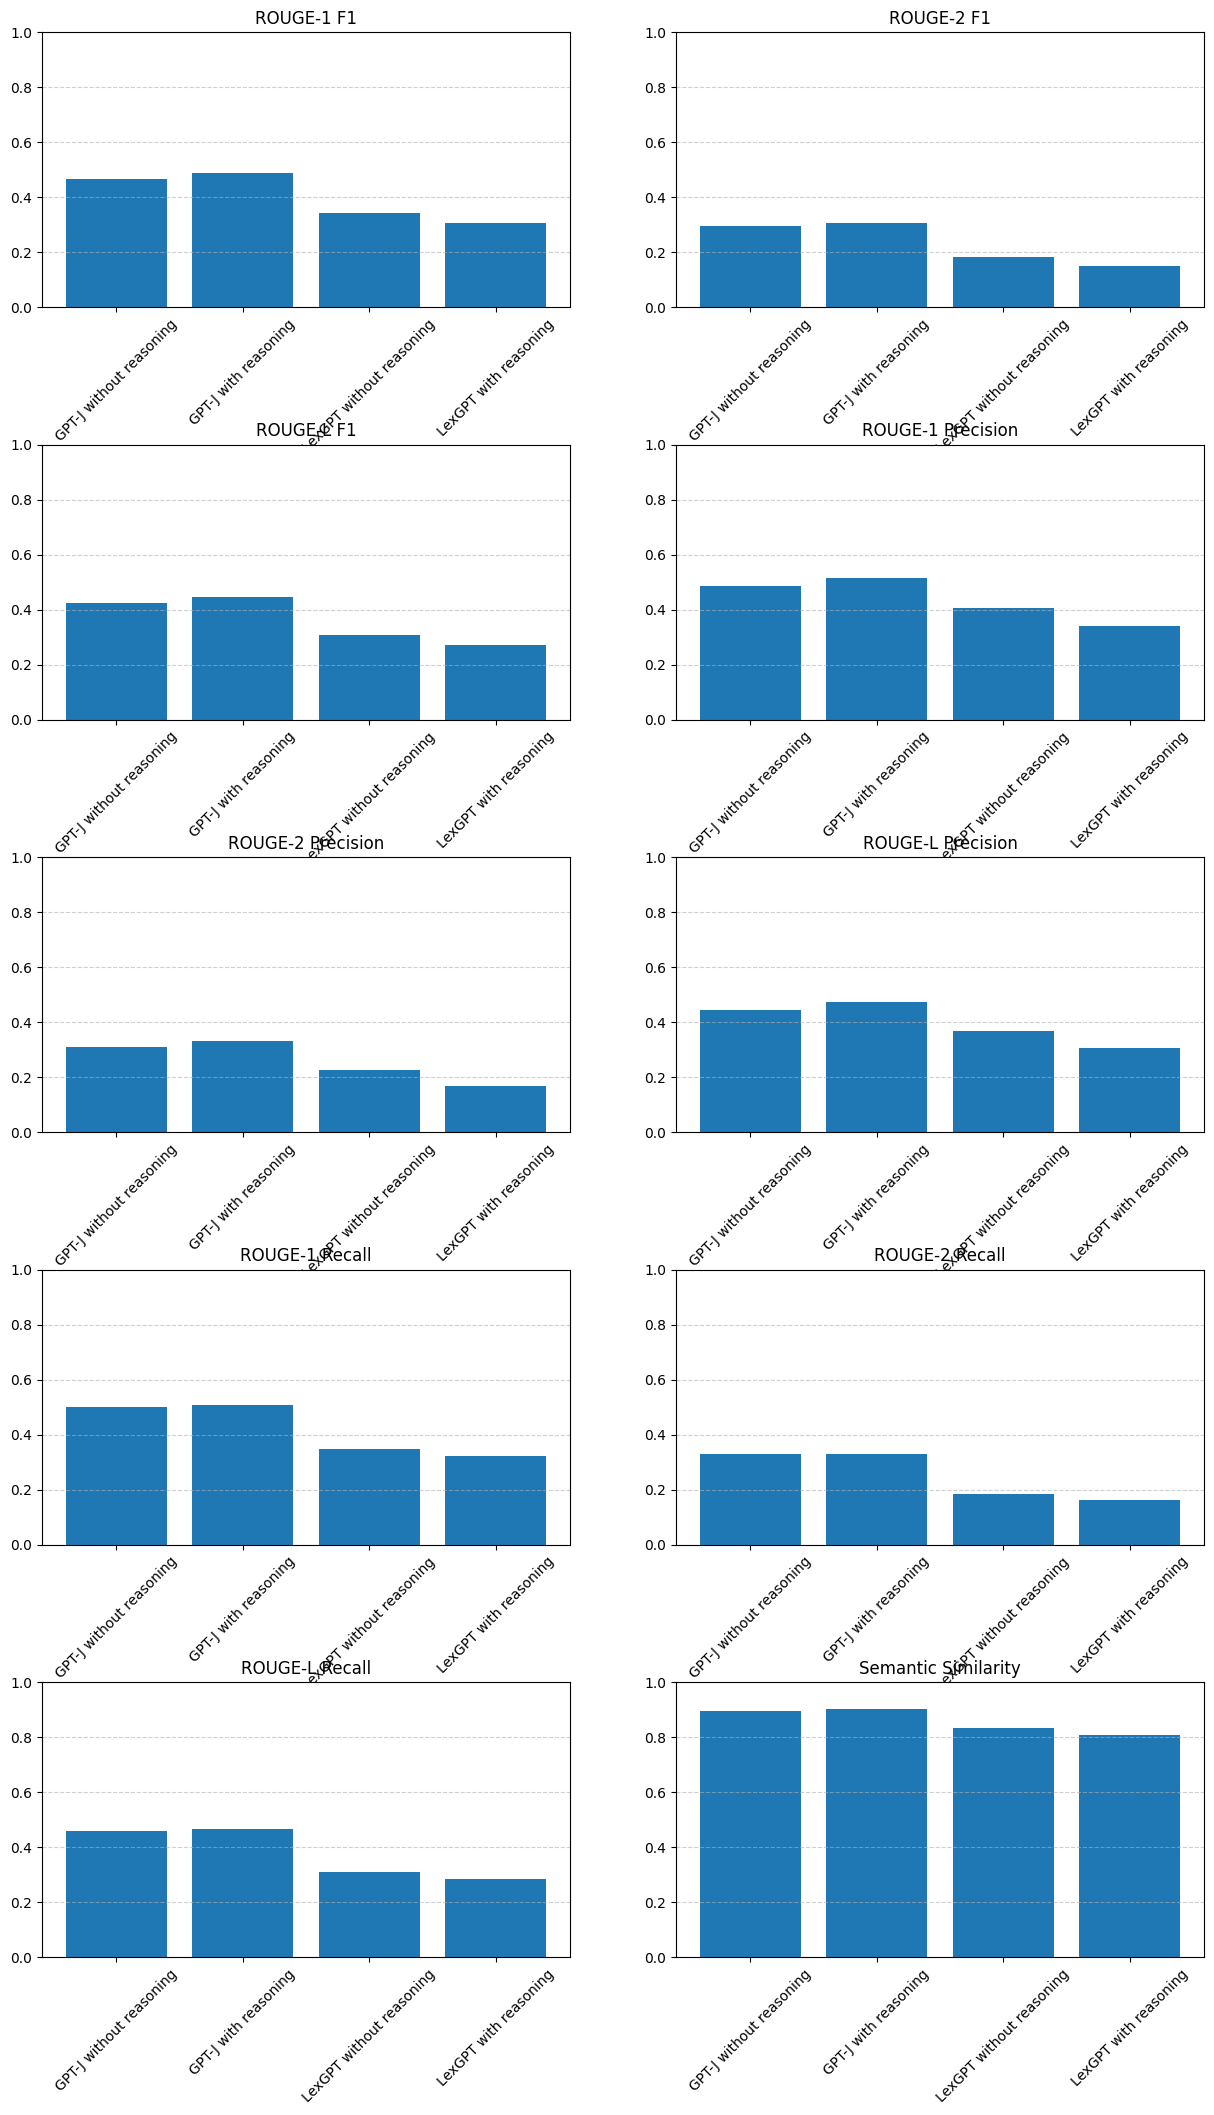

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
metrics = {
    "ROUGE-1 F1": [0.4668, 0.4875, 0.3425, 0.3053],
    "ROUGE-2 F1": [0.2974, 0.3079, 0.1821, 0.1485],
    "ROUGE-L F1": [0.4264, 0.446, 0.3072, 0.2702],
    "ROUGE-1 Precision": [0.4857, 0.5169, 0.4076, 0.3422],
    "ROUGE-2 Precision": [0.3107, 0.3312, 0.225, 0.1678],
    "ROUGE-L Precision": [0.4431, 0.4734, 0.3676, 0.3051],
    "ROUGE-1 Recall": [0.5006, 0.5095, 0.3472, 0.3219],
    "ROUGE-2 Recall": [0.3307, 0.3319, 0.1859, 0.1643],
    "ROUGE-L Recall": [0.4582, 0.4662, 0.3105, 0.2842],
    "Semantic Similarity": [0.894, 0.9031, 0.8338, 0.8081],
}

labels = ["GPT-J without reasoning", "GPT-J with reasoning", "LexGPT without reasoning", "LexGPT with reasoning"]

# Plotting each metric
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)

for ax, (metric, values) in zip(axes.flatten(), metrics.items()):
    ax.bar(labels, values)
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.show()


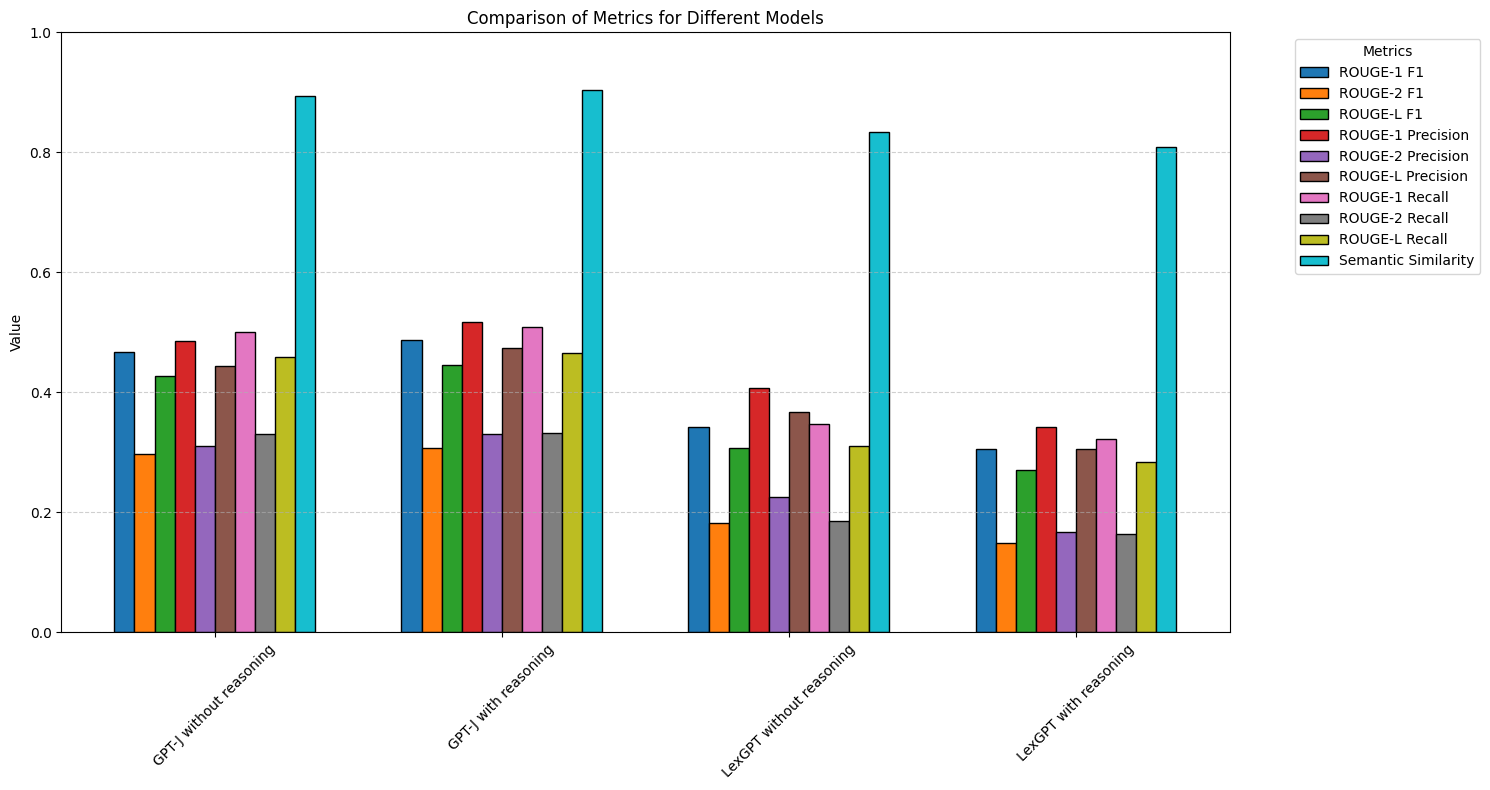

In [2]:
# Set up the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Define the width of each bar and the positions for each group of bars
width = 0.07
x_positions = np.arange(len(labels))

# Plot each metric
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x_positions + i * width, values, width=width, label=metric, edgecolor='black')

# Set the x-ticks, labels, and other details
ax.set_xticks(x_positions + (len(metrics) - 1) * width / 2)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 1)
ax.set_title('Comparison of Metrics for Different Models')
ax.set_ylabel('Value')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Metrics")
plt.tight_layout()
plt.show()


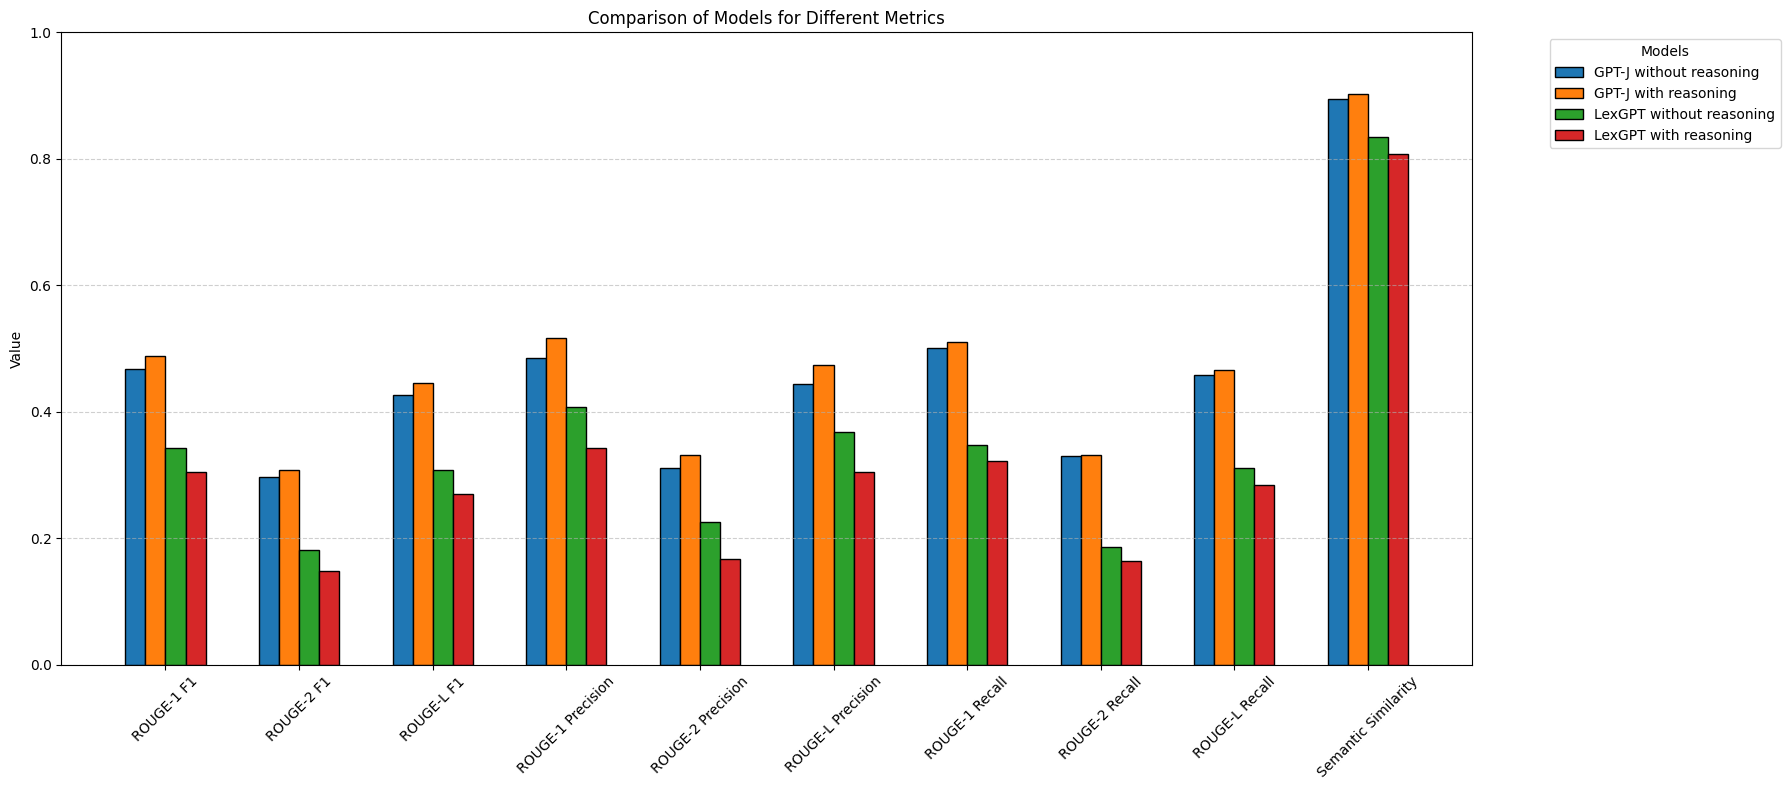

In [3]:
# Set up the figure
fig, ax = plt.subplots(figsize=(18, 8))

# Define the width of each bar and the positions for each group of bars
width = 0.15
x_positions = np.arange(len(metrics))

# Plot each model configuration
for i, label in enumerate(labels):
    values = [metrics[metric][i] for metric in metrics]
    ax.bar(x_positions + i * width, values, width=width, label=label, edgecolor='black')

# Set the x-ticks, labels, and other details
ax.set_xticks(x_positions + (len(labels) - 1) * width / 2)
ax.set_xticklabels(metrics.keys())
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 1)
ax.set_title('Comparison of Models for Different Metrics')
ax.set_ylabel('Value')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Models")
plt.tight_layout()
plt.show()


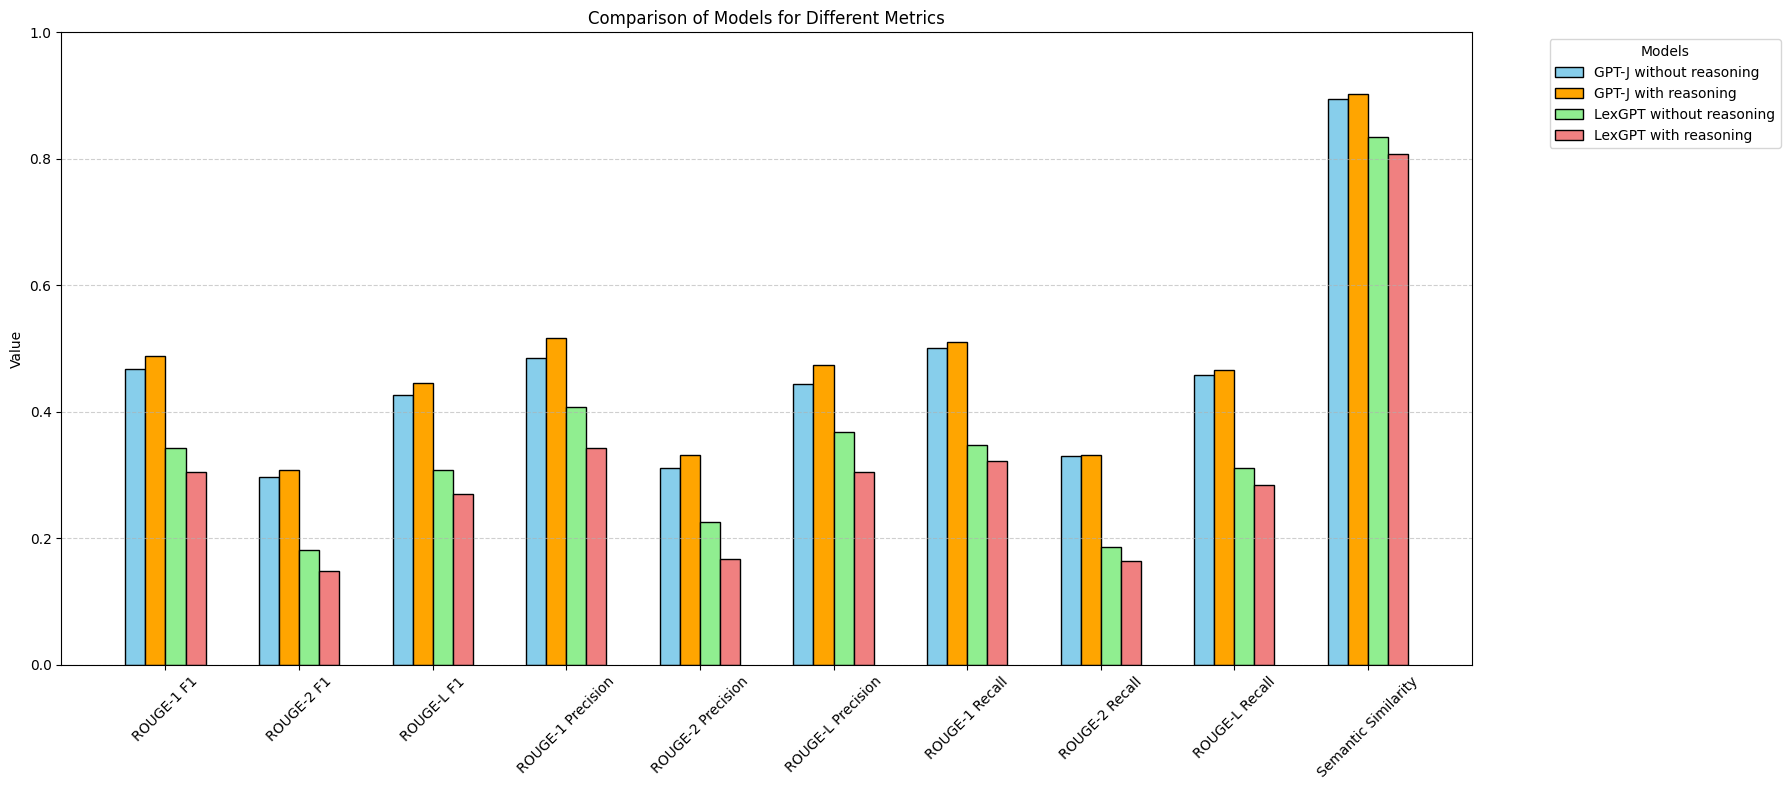

In [4]:
# Define a color palette
colors = ['skyblue', 'orange', 'lightgreen', 'lightcoral']

# Set up the figure
fig, ax = plt.subplots(figsize=(18, 8))

# Plot each model configuration with a different color
for i, label in enumerate(labels):
    values = [metrics[metric][i] for metric in metrics]
    ax.bar(x_positions + i * width, values, width=width, label=label, edgecolor='black', color=colors[i])

# Set the x-ticks, labels, and other details
ax.set_xticks(x_positions + (len(labels) - 1) * width / 2)
ax.set_xticklabels(metrics.keys())
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 1)
ax.set_title('Comparison of Models for Different Metrics')
ax.set_ylabel('Value')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Models")
plt.tight_layout()
plt.show()

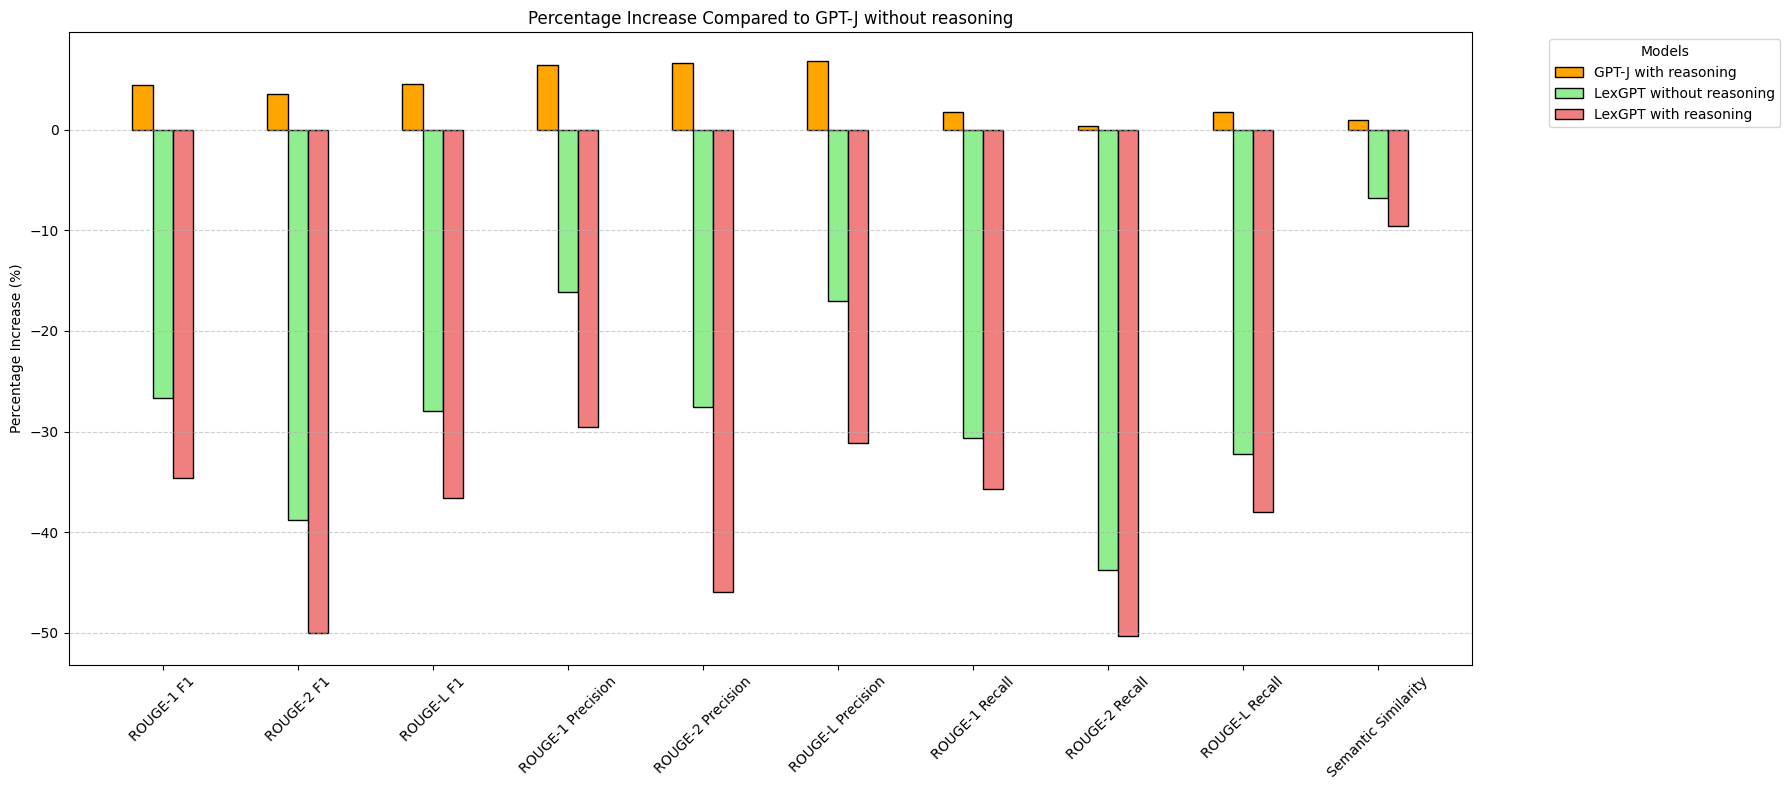

In [6]:
# Calculate the percentage increase relative to the first model (baseline)
percentage_increase = {}
for metric, values in metrics.items():
    baseline_value = values[0]
    increase_values = [(value - baseline_value) / baseline_value * 100 for value in values[1:]]
    percentage_increase[metric] = increase_values

# Set up the figure
fig, ax = plt.subplots(figsize=(18, 8))

# Plot each model configuration with a different color, excluding the baseline
for i, label in enumerate(labels[1:]):
    values = [percentage_increase[metric][i] for metric in percentage_increase]
    ax.bar(x_positions + i * width, values, width=width, label=label, edgecolor='black', color=colors[i + 1])

# Set the x-ticks, labels, and other details
ax.set_xticks(x_positions + (len(labels) - 2) * width / 2)
ax.set_xticklabels(metrics.keys())
ax.tick_params(axis='x', rotation=45)
ax.set_title('Percentage Increase Compared to GPT-J without reasoning')
ax.set_ylabel('Percentage Increase (%)')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Models")
plt.tight_layout()
plt.show()


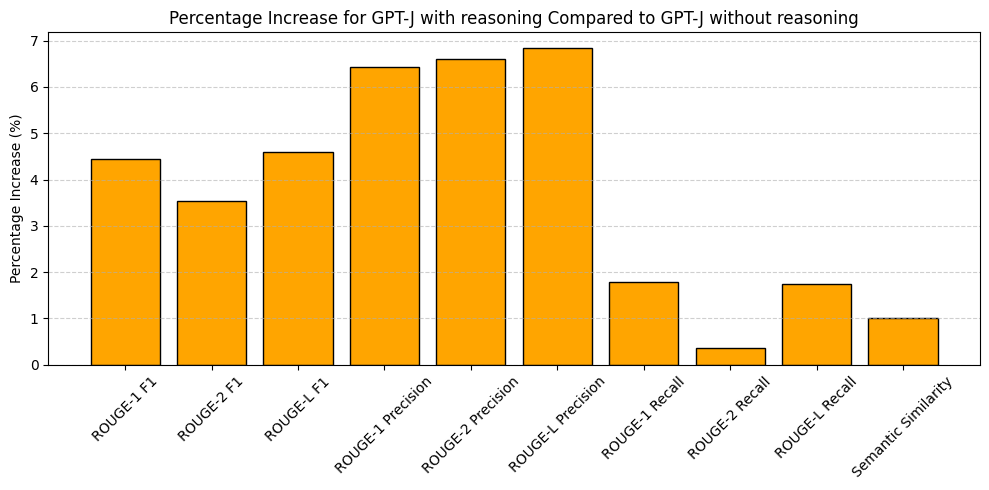

In [7]:
# Get the percentage increase values for the "GPT-J with reasoning" model
gpt_j_with_reasoning_increase = [percentage_increase[metric][0] for metric in percentage_increase]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the percentage increase for "GPT-J with reasoning"
ax.bar(metrics.keys(), gpt_j_with_reasoning_increase, color='orange', edgecolor='black')

# Set the labels and other details
ax.tick_params(axis='x', rotation=45)
ax.set_title('Percentage Increase for GPT-J with reasoning Compared to GPT-J without reasoning')
ax.set_ylabel('Percentage Increase (%)')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
